In [ ]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'NVDA', 'V', 'JPM', 'UNH',
           'JNJ', 'BAC', 'WMT', 'PG', 'HD', 'MA', 'XOM', 'PFE', 'DIS', 'CVX',
           'KO', 'AVGO', 'PEP', 'CSCO', 'WFC', 'COST', 'LLY', 'ADBE']

In [ ]:
ohlc = yf.download(tickers, start="2009-12-31", end="2021-12-31")

[*********************100%%**********************]  27 of 27 completed


In [ ]:
prices = ohlc["Adj Close"]
prices.tail()

Ticker,AAPL,ADBE,AMZN,AVGO,BAC,BRK-A,COST,CSCO,CVX,DIS,...,MSFT,NVDA,PEP,PFE,PG,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,174.066498,569.619995,171.068497,627.081848,41.803978,444654.0,528.910828,57.665207,106.947594,153.130936,...,328.062073,295.977844,159.524109,53.588821,150.426544,479.969360,212.902878,45.496986,44.936298,56.231396
2021-12-27,178.065659,577.679993,169.669495,636.024109,42.011021,447110.0,541.500183,58.720730,109.134125,152.303635,...,335.668427,309.009308,161.112000,54.036072,152.183563,483.961182,213.895523,45.882713,45.345421,57.033127
2021-12-28,177.038712,569.359985,170.660995,631.043518,42.067490,449570.0,542.624512,58.822582,108.922829,154.695831,...,334.492188,302.788177,161.948273,52.949879,153.001007,487.294220,214.308334,45.553432,45.996159,56.848820
2021-12-29,177.127594,569.289978,169.201004,634.448730,42.001614,452102.0,545.632507,59.220718,108.362411,154.366898,...,335.178253,299.582764,162.521408,52.557396,154.269424,489.852112,214.426239,45.581661,45.973610,56.351204
2021-12-30,175.962387,570.530029,168.644501,627.346008,41.907497,452700.0,541.922974,58.905907,107.884682,155.423447,...,332.600372,295.438660,162.239532,53.305862,152.935242,488.737823,214.131409,45.252380,46.121799,56.019451


In [ ]:
## Expected returns and risk models


In [ ]:
import pypfopt
from pypfopt import risk_models, expected_returns
from pypfopt import plotting


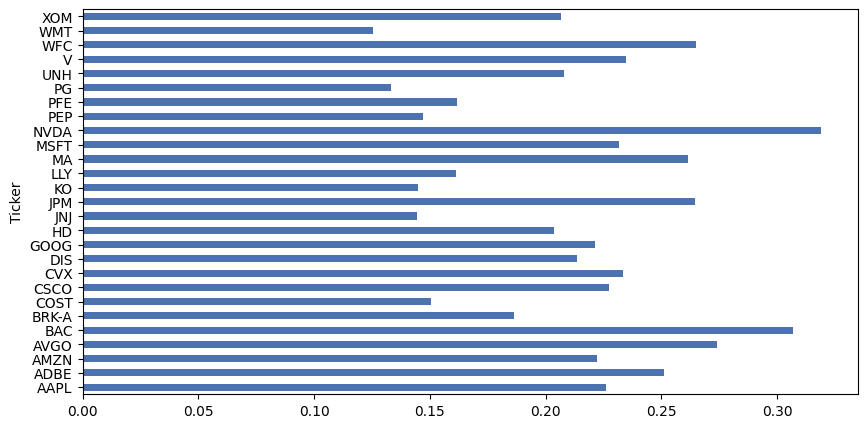

In [ ]:
mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)
#mu.plot.barh(figsize=(10,5));

In [ ]:
##Min volatility with a transaction cost objective

# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(tickers)] * len(tickers))

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S)
## 1% broker commission
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg, gamma=0.05)  # default is 1
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.02121),
             ('ADBE', 0.0),
             ('AMZN', 0.01948),
             ('AVGO', 0.0),
             ('BAC', 0.0),
             ('BRK-A', 0.06331),
             ('COST', 0.0808),
             ('CSCO', 0.02441),
             ('CVX', 0.01165),
             ('DIS', 0.03042),
             ('GOOG', 0.03243),
             ('HD', 0.03704),
             ('JNJ', 0.09075),
             ('JPM', 0.0),
             ('KO', 0.07796),
             ('LLY', 0.05646),
             ('MA', 0.0),
             ('MSFT', 0.02614),
             ('NVDA', 0.0),
             ('PEP', 0.0799),
             ('PFE', 0.06163),
             ('PG', 0.09615),
             ('UNH', 0.03537),
             ('V', 0.02759),
             ('WFC', 0.0),
             ('WMT', 0.09499),
             ('XOM', 0.0323)])

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 16.9%
Annual volatility: 10.8%
Sharpe Ratio: 1.37


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 22.6%
Annual volatility: 14.3%
Sharpe Ratio: 1.44


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.225914985013465, 0.1427218421684768, 1.4427713507957072)

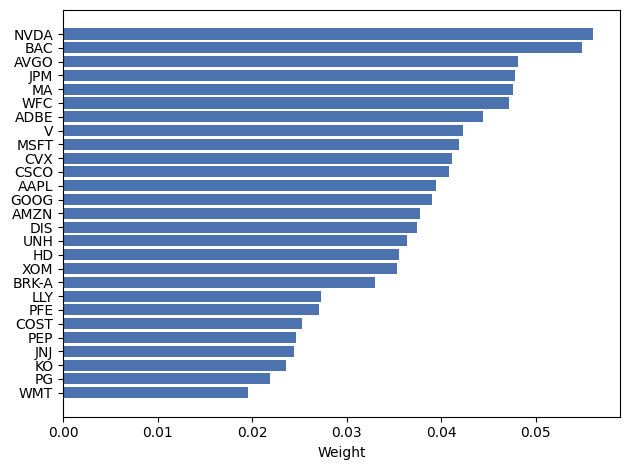

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(mu,S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

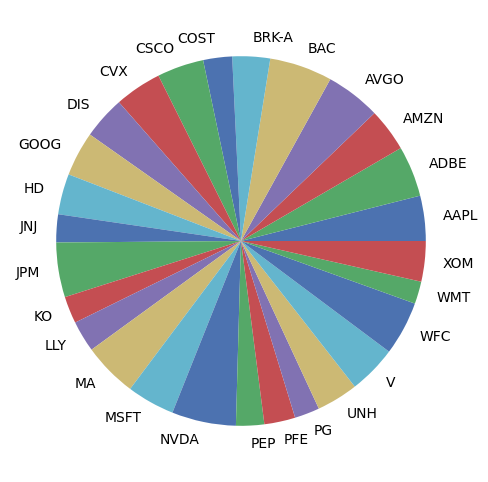

In [ ]:
pd.Series(weights).plot.pie(figsize=(6,6));

In [ ]:
#To save the MVO portfolio weight
Mvo=df = pd.DataFrame.from_dict(weights, orient='index', columns=['0'])
Mvo.to_csv('MVO_weight.csv')

In [ ]:
Mvo

,0
AAPL,0.03947
ADBE,0.04438
AMZN,0.03777
AVGO,0.04810
BAC,0.05492
BRK-A,0.03299
COST,0.02526
CSCO,0.04083
CVX,0.04110
DIS,0.03749
